<a href="https://colab.research.google.com/github/yuliyagk/ReDI-DS-2021-final-project/blob/main/Project_Orbit_Classification_Yuliya_complex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Orbit Classification For Prediction / NASA
The data used for the project can be found at: https://www.kaggle.com/brsdincer/orbitclassification

## Description of the Data

DATA FOR ORBIT CLASS PREDICTION
It is based on prediction process.
Data was generated without including unnecessary columns.

INLUCED:

* a (AU) -- Semi-major axis of the orbit in AU
* e -- Eccentricity of the orbit
* i (deg) -- Inclination of the orbit with respect to the ecliptic plane and the equinox of 
J2000 (J2000-Ecliptic) in degrees
* w (deg) -- Argument of perihelion (J2000-Ecliptic) in degrees
* Node (deg) -- Longitude of the ascending node (J2000-Ecliptic) in degrees
* M (deg) -- Mean anomoly at epoch in degrees
* q (AU) -- Perihelion distance of the orbit in AU
* Q (AU) -- Aphelion distance of the orbit in AU
* P (yr) -- Orbital period in Julian years
* H (mag) -- Absolute V-magnitude
* MOID (AU) -- Minimum orbit intersection distance (the minimum distance between the osculating orbits of the NEO and the Earth
class -- Object classification

CLASS:

* AMO*
* APO
* APO*
* ATE
* ATE*
* IEO*


# Data Analysis and Cleaning

In [ ]:
# Import the usual packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Let's check if the data is there
!ls

'classast - pha.csv'   sample_data


In [ ]:
# Loading in the file and look at the first few rows
df = pd.read_csv('classast - pha.csv')
df.head() 

a (AU)         e    i (deg)     w (deg)  ...  P (yr)  H (mag)  MOID (AU)  class
0  1.078066  0.826854  22.825495   31.382966  ...    1.12    16.90   0.034507   APO*
1  1.245304  0.335342  13.337482  276.893024  ...    1.39    15.60   0.030669   APO*
2  1.470264  0.559922   6.352995  285.852564  ...    1.78    16.25   0.025795   APO*
3  1.776025  0.650141  39.832538  267.791993  ...    2.37    15.20   0.003551   APO*
4  1.874123  0.764602   1.326400   43.388048  ...    2.57    18.80   0.011645   APO*

[5 rows x 12 columns]

In [ ]:
# look at the columns
df.columns

Index(['a (AU)', 'e', 'i (deg)', 'w (deg)', 'Node (deg)', 'M (deg)', 'q (AU)',
       'Q (AU)', 'P (yr)', 'H (mag)', 'MOID (AU)', 'class'],
      dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of         a (AU)         e    i (deg)  ...  H (mag)  MOID (AU)  class
0     1.078066  0.826854  22.825495  ...    16.90   0.034507   APO*
1     1.245304  0.335342  13.337482  ...    15.60   0.030669   APO*
2     1.470264  0.559922   6.352995  ...    16.25   0.025795   APO*
3     1.776025  0.650141  39.832538  ...    15.20   0.003551   APO*
4     1.874123  0.764602   1.326400  ...    18.80   0.011645   APO*
...        ...       ...        ...  ...      ...        ...    ...
1743  1.662826  0.382487   0.874625  ...    21.08   0.036365   AMO*
1744  2.706630  0.764459  11.433742  ...    20.19   0.016630   APO*
1745  2.037870  0.667525   8.906649  ...    21.86   0.007084   APO*
1746  2.095193  0.654662   4.014503  ...    21.91   0.044428   APO*
1747  2.804294  0.667236   4.724883  ...    20.40   0.028788   APO*

[1748 rows x 12 columns]>

In [ ]:
# look of the type of our dataset
df.dtypes

a (AU)        float64
e             float64
i (deg)       float64
w (deg)       float64
Node (deg)    float64
M (deg)       float64
q (AU)        float64
Q (AU)        float64
P (yr)        float64
H (mag)       float64
MOID (AU)     float64
class          object
dtype: object

In [ ]:
# look if we have the missing data
df.isnull().sum()

a (AU)        0
e             0
i (deg)       0
w (deg)       0
Node (deg)    0
M (deg)       0
q (AU)        0
Q (AU)        0
P (yr)        0
H (mag)       0
MOID (AU)     0
class         0
dtype: int64

In [ ]:
# looking if there are duplicate rows
(df.shape[0]) - (df.drop_duplicates().shape[0])

0

In [ ]:
# look at the class values
df['class'].unique()

array(['APO*', 'ATE*', 'AMO*', 'APO', 'IEO*', 'ATE'], dtype=object)

In [ ]:
# count the value of the class rate
df['class'].value_counts()

APO*    1477
ATE*     149
AMO*      96
APO       14
ATE        7
IEO*       5
Name: class, dtype: int64

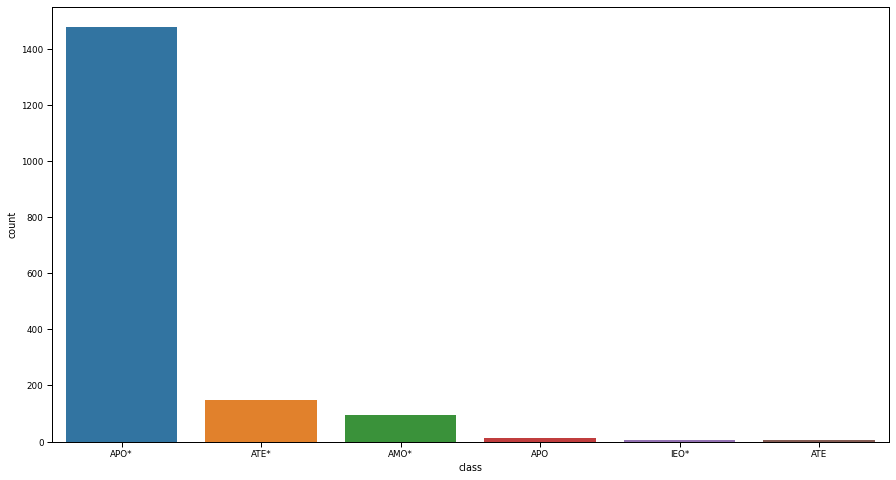

In [ ]:
# make the visualitions for the better understanding of the classes
plt.rcParams['figure.figsize'] = (15,8)
sns.set_context("paper")

sns.countplot(x='class',data=df)

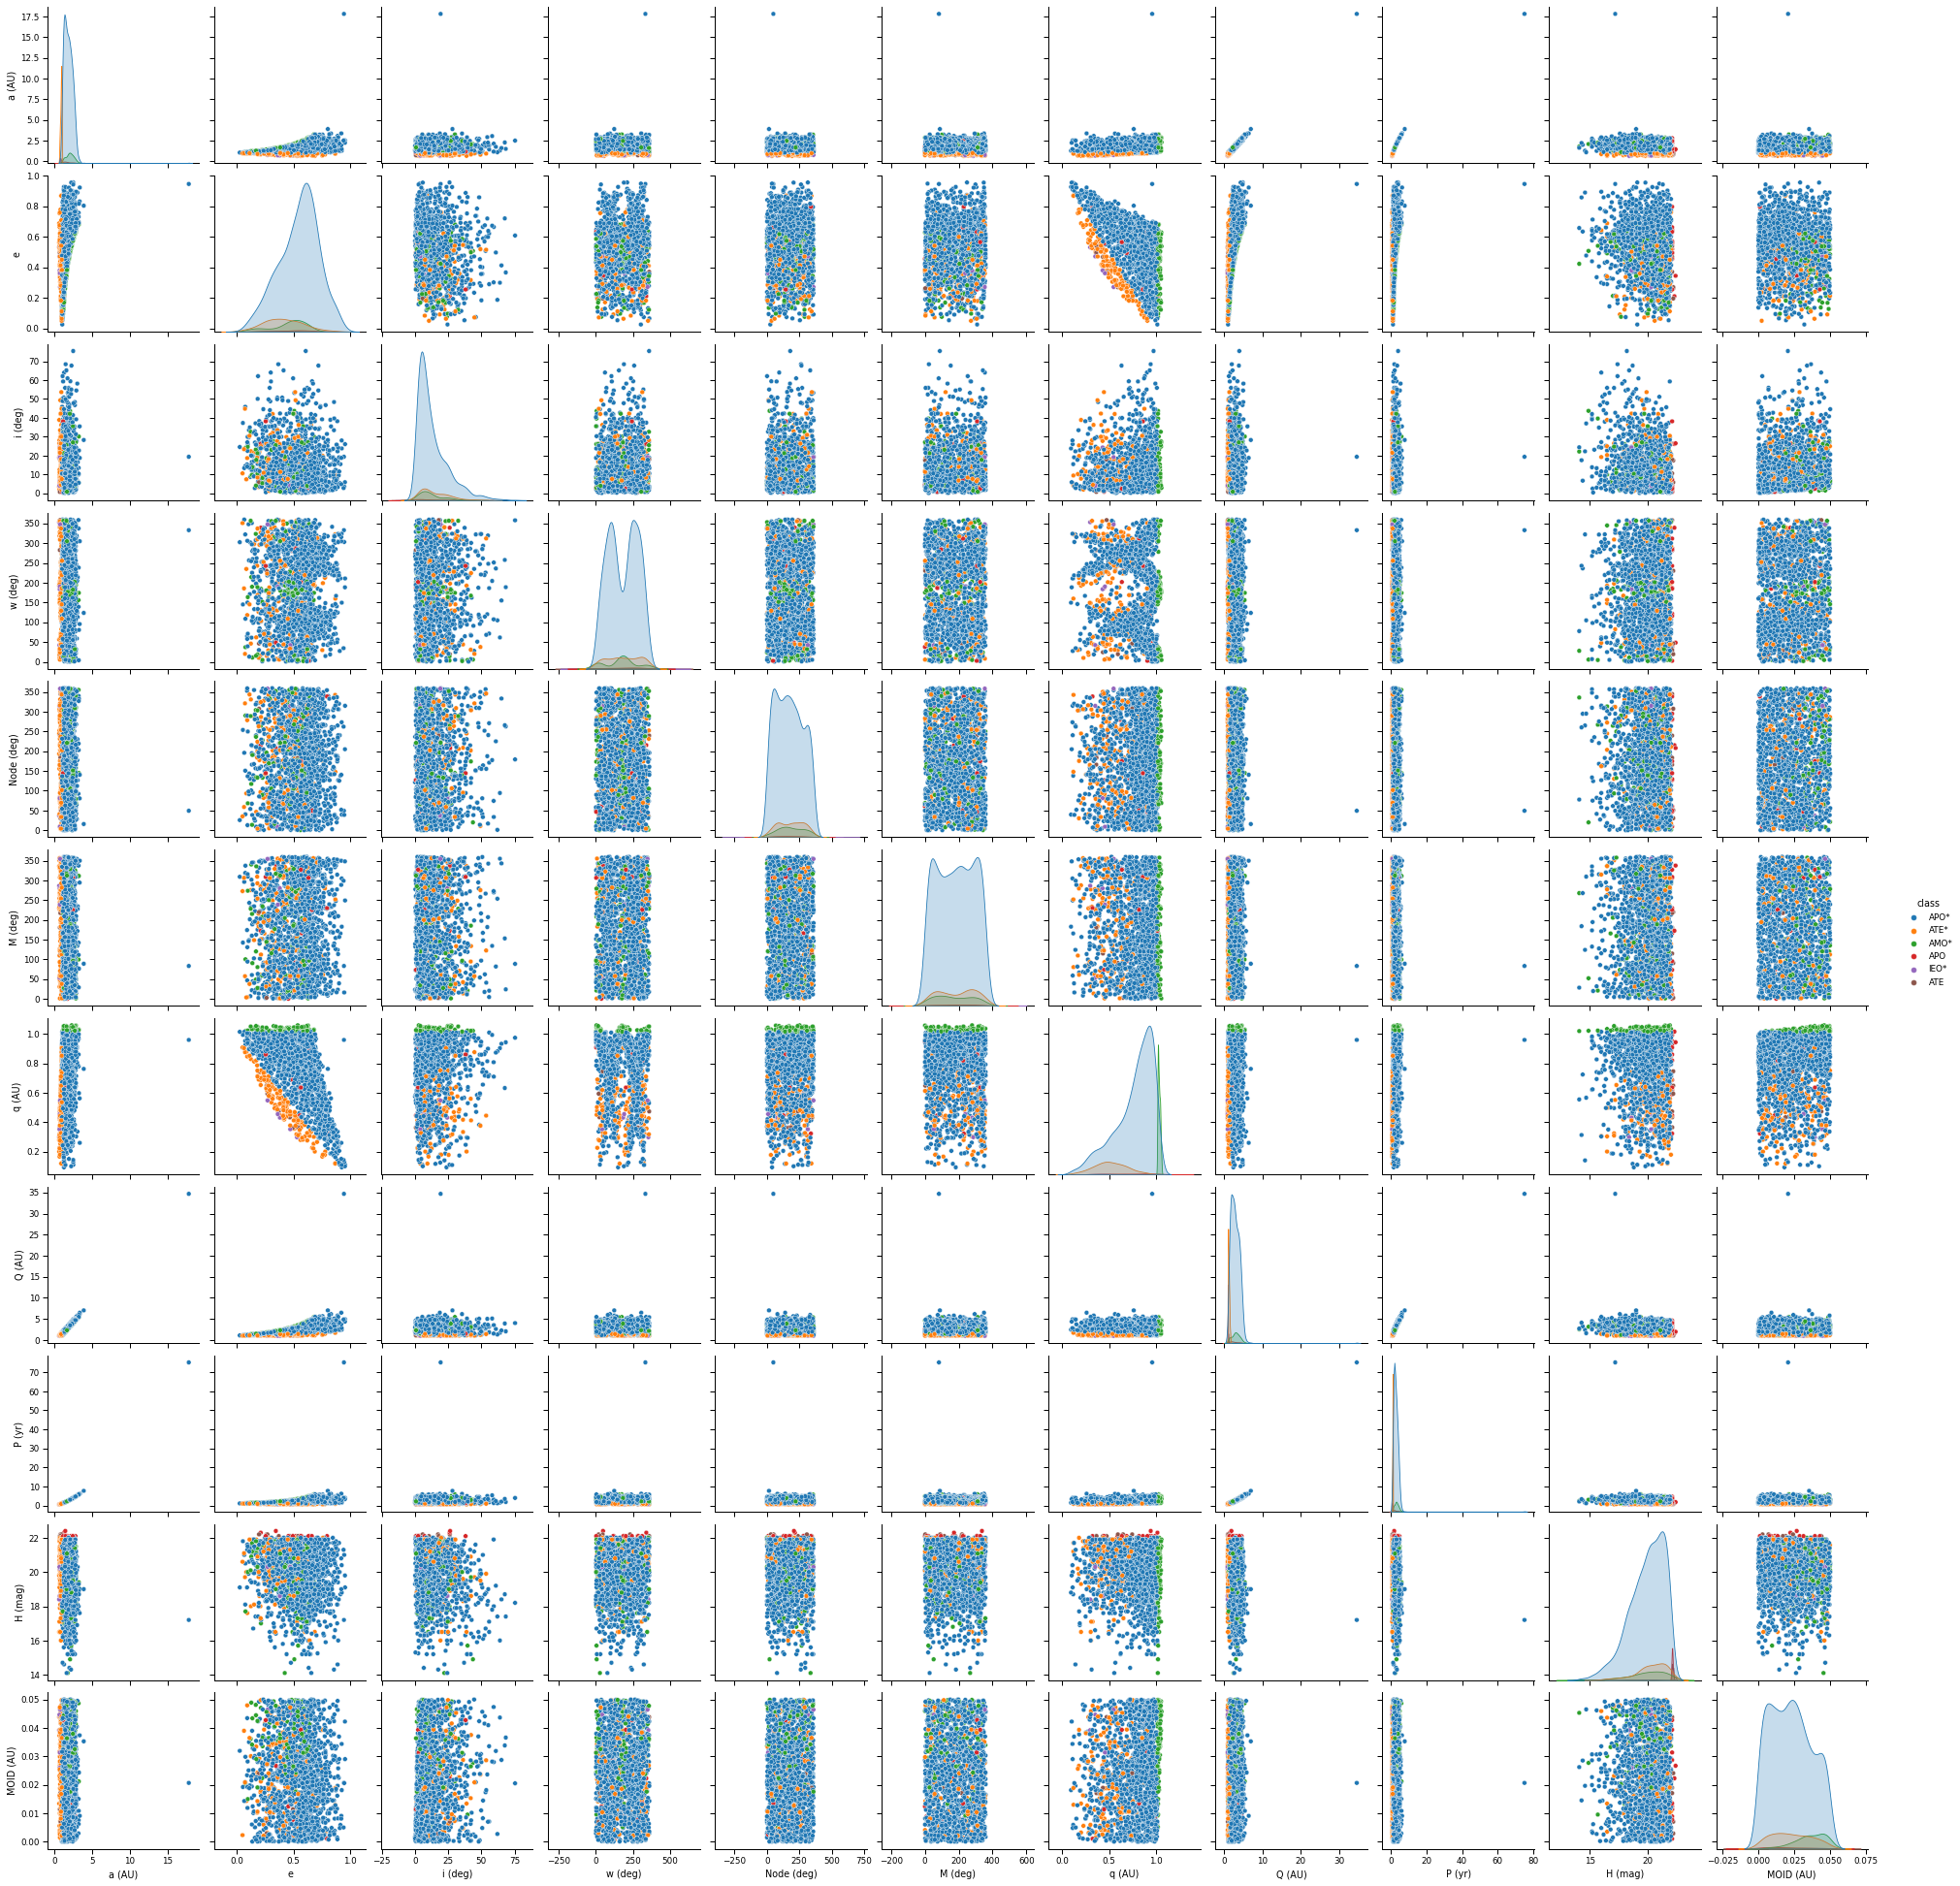

In [122]:
# now we analyse, wich factors makes the most and the less influence 
# for that we are using histograms colored with the class. 

#for current_column in df.columns.drop('class') :
#  sns.histplot(data=df,x=current_column, hue='class', kde=True, element='step', palette='Set1')
#  plt.show()

sns.pairplot(data=df,hue='class')

# Building Machine Learning Model

In [ ]:
from sklearn.model_selection import train_test_split
y = df['class']
X = df.drop(columns=['class'])

In [ ]:
# We use the train_test_split function to split our data into four parts
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y,
                                                    test_size=0.33, 
                                                    shuffle=True,
                                                    random_state=123)

In [ ]:
import imblearn

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

from imblearn.under_sampling import RandomUnderSampler


#sm = SMOTE(random_state = 420, kind='regular', k_neighbors=2)
#sm = SMOTE(random_state = 42, sampling_strategy='minority', k_neighbors=2)
#sm = BorderlineSMOTE(random_state = 42, kind='borderline-2')#, k_neighbors=2)
#sm = ADASYN(random_state = 42, sampling_strategy='minority', n_neighbors=2)
#sm = SMOTEENN(random_state = 42)
sm = RandomOverSampler(random_state=42)

X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
X_train_balanced = X_train_oversampled
y_train_balanced = y_train_oversampled



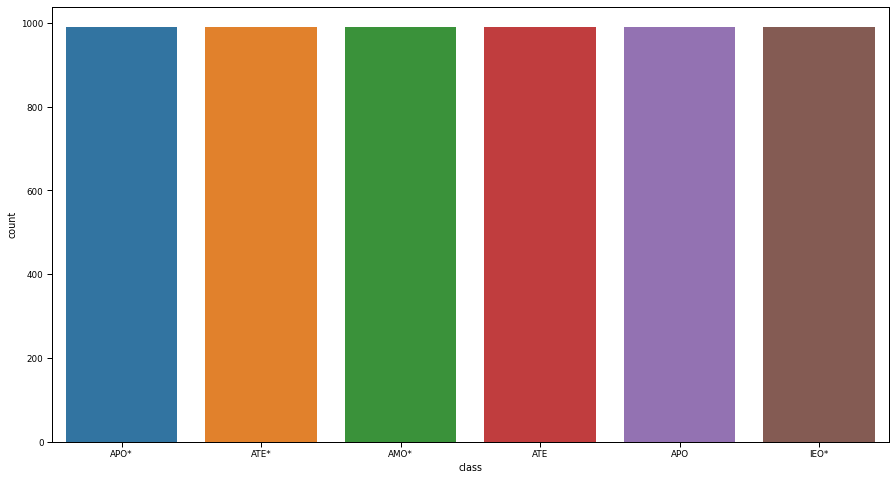

In [ ]:
df_balanced = pd.DataFrame(data=X_train_balanced, columns=df.columns.drop('class'))

df_balanced['class'] = y_train_balanced
sns.countplot(x='class', data=df_balanced)

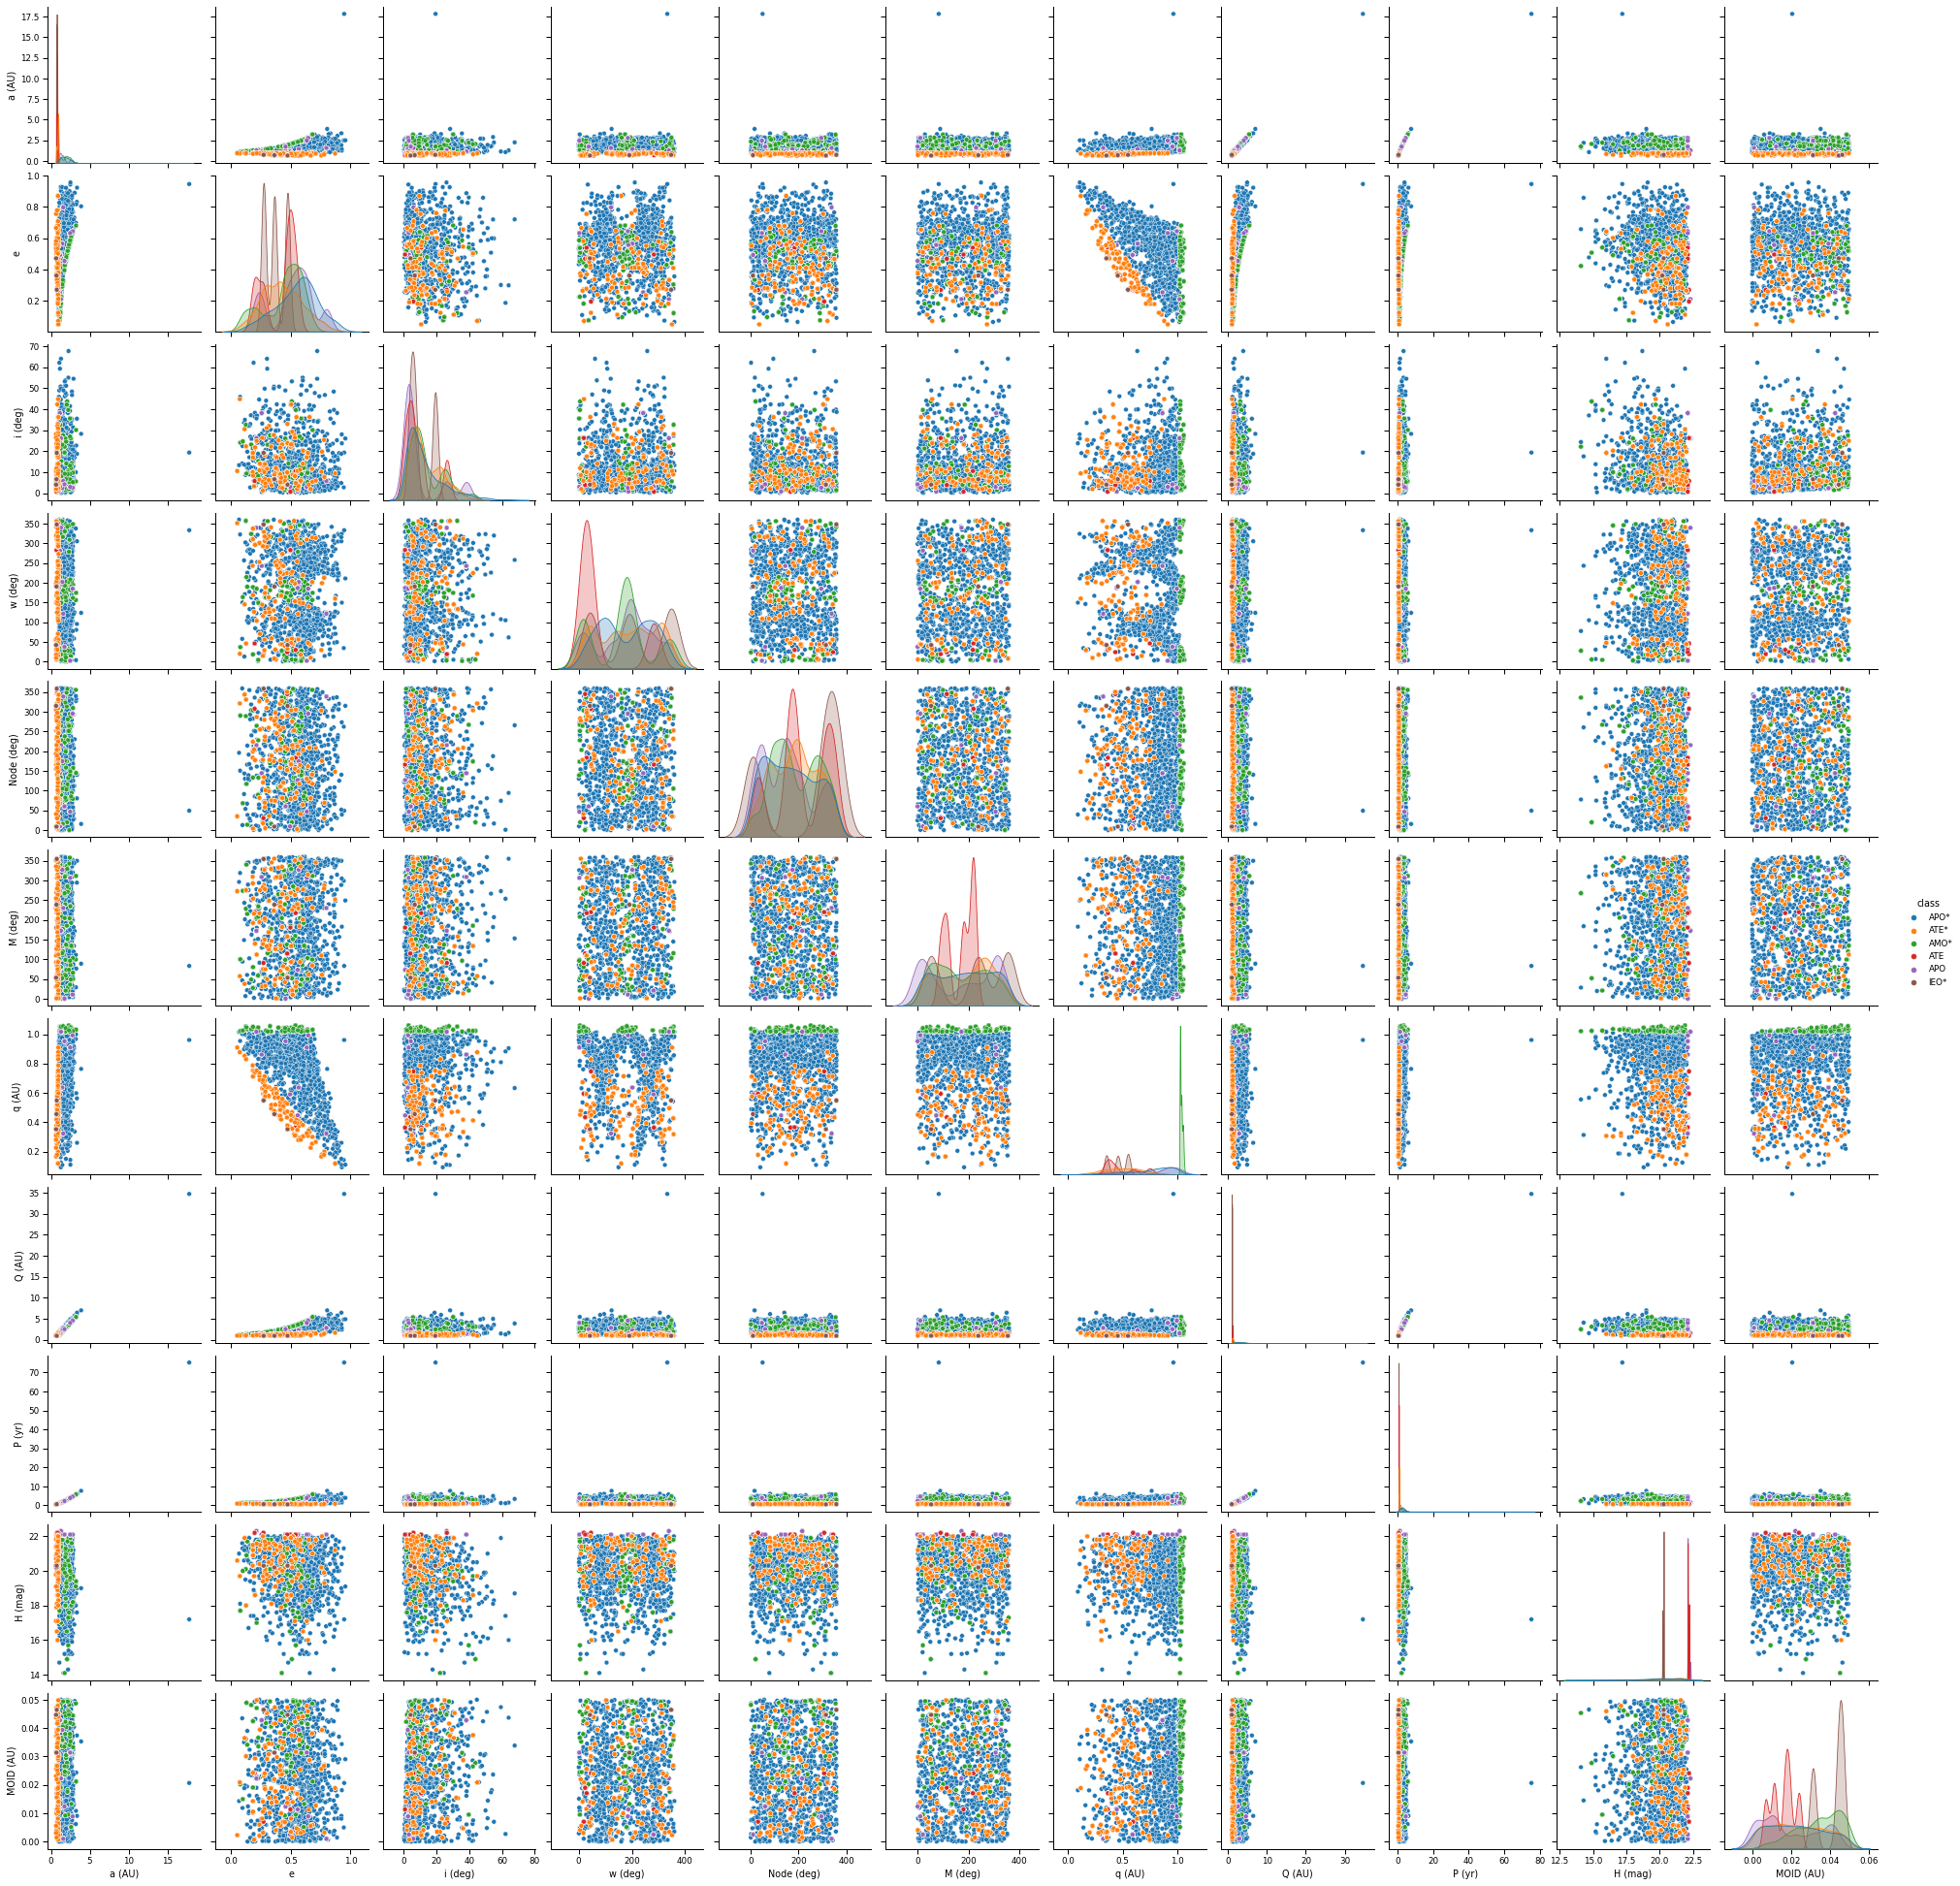

In [ ]:
sns.pairplot(data=df_balanced,hue='class')#, palette='Set1')

In [123]:
# Let's check the shape of our train dataset
df_balanced.shape

(5940, 12)

In [124]:
# Quick sanity check 
len(df_balanced) * (1 - 0.33)

3979.7999999999997

In [ ]:
# Trying out which Classifier gives the best accuracy score

#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#classificator = GradientBoostingClassifier(n_estimators=100, random_state=123)
#classificator = DecisionTreeClassifier(criterion = 'entropy', random_state = 123)
classificator = RandomForestClassifier(n_estimators=100, random_state = 123)


In [ ]:
# Train ("fit") the model on the training data
classificator.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [ ]:
# Use the trained model to make predictions on the test data
y_pred = classificator.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9965337954939342

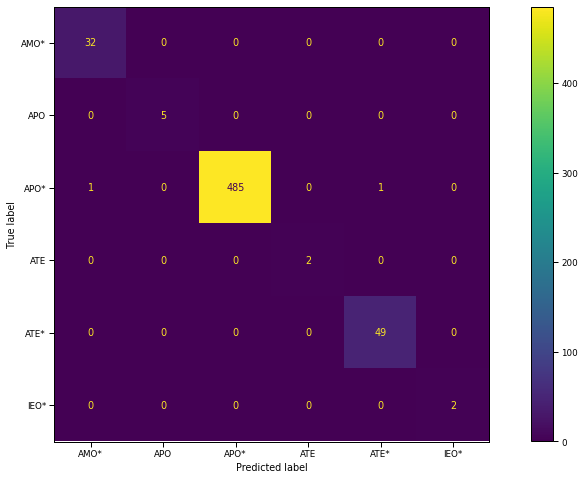

In [126]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classificator, X_test, y_test, values_format = '')

In [127]:
from sklearn.metrics import classification_report
# Let's use the classification_report function to understand the results better
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        AMO*       0.97      1.00      0.98        32
         APO       1.00      1.00      1.00         5
        APO*       1.00      1.00      1.00       487
         ATE       1.00      1.00      1.00         2
        ATE*       0.98      1.00      0.99        49
        IEO*       1.00      1.00      1.00         2

    accuracy                           1.00       577
   macro avg       0.99      1.00      1.00       577
weighted avg       1.00      1.00      1.00       577



In [ ]:
#!pip install graphviz
#!apt install graphviz
#!apt install libgraphviz-dev

100


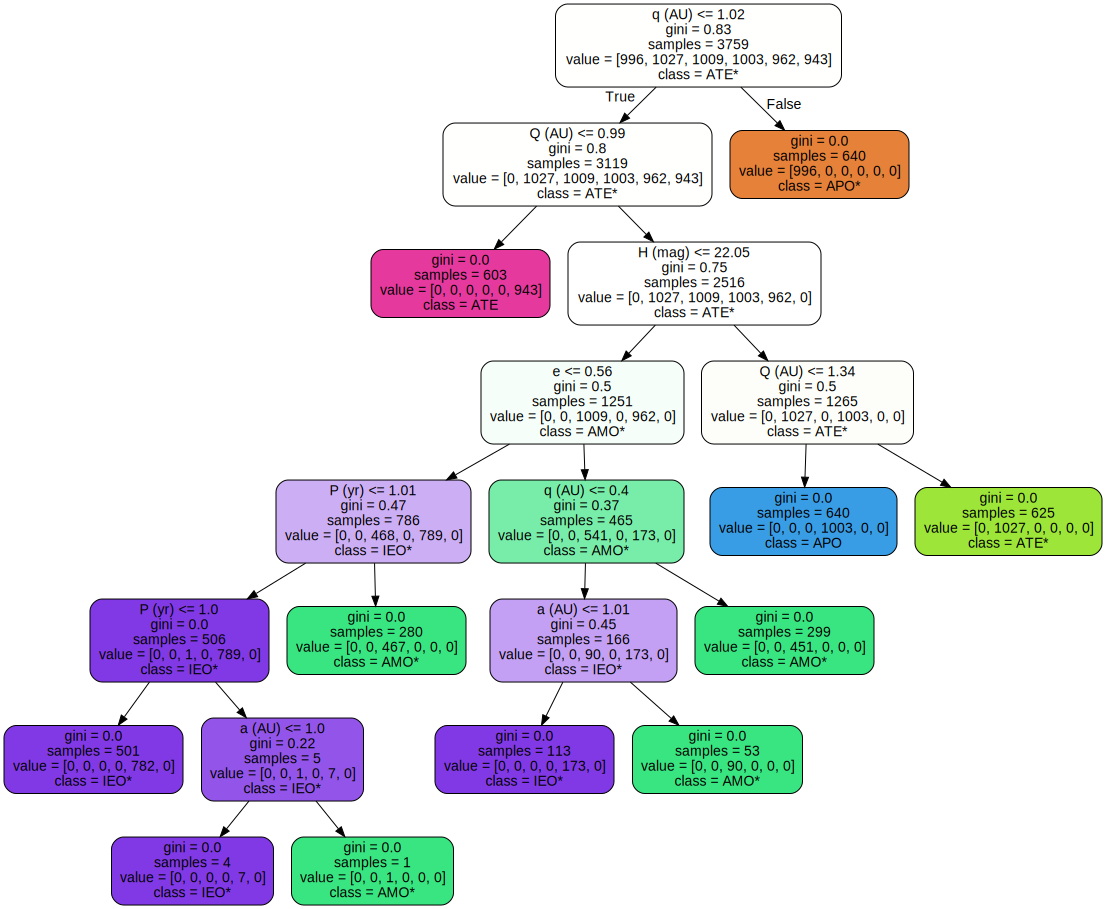

In [129]:

# Extract single tree
estimator = classificator.estimators_[10]
print(len(classificator.estimators_))

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = df.columns.drop('class'),
                class_names = df['class'].unique(),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tsvg', 'tree.dot', '-o', 'tree.svg'])

# Display in jupyter notebook
from IPython.display import Image
from IPython.display import SVG, display
display(SVG(filename = 'tree.svg'))

In [ ]:
#https://towardsdatascience.com/dealing-with-imbalanced-dataset-642a5f6ee297
#https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/